<a href="https://colab.research.google.com/github/aka-hombre/MAT422/blob/main/422_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Run this to use graph tool library in google collab
!wget https://downloads.skewed.de/skewed-keyring/skewed-keyring_1.0_all_$(lsb_release -s -c).deb
!dpkg -i skewed-keyring_1.0_all_$(lsb_release -s -c).deb
!echo "deb [signed-by=/usr/share/keyrings/skewed-keyring.gpg] https://downloads.skewed.de/apt $(lsb_release -s -c) main" > /etc/apt/sources.list.d/skewed.list
!apt-get update
!apt-get install python3-graph-tool python3-matplotlib python3-cairo
!apt purge python3-cairo
!apt install libcairo2-dev pkg-config python3-dev
!pip install --force-reinstall pycairo
!pip install zstandard

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import graph_tool.all as gt
from graph_tool.all import*
import scipy

# Graphs, the Laplacian, and Spectral Graph partitioning

We will be uising a [dataset](https://https://networks.skewed.de/net/dolphins) of an undirected social network of frequent associations observed among 62 dolphins. Since the network is small enough we can index each of our vertices to visualize each dolphin in our community.

Undirected graph/network of the dolphins:
Our graph has 62 vertices and 159 edges.


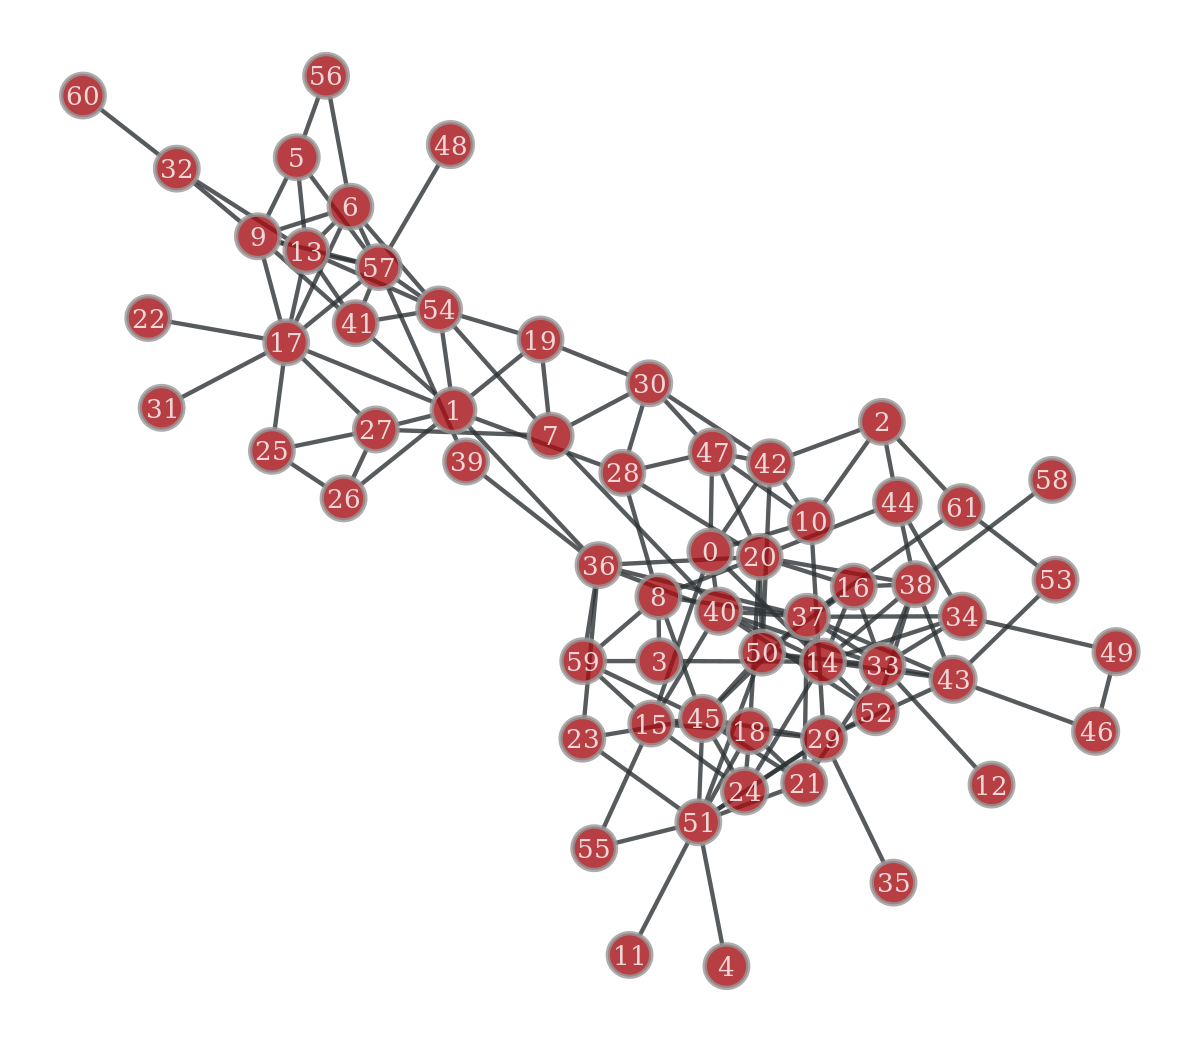

In [72]:
g = gt.collection.ns["dolphins"] #loading in the network data
print("Undirected graph/network of the dolphins:")
print(f"Our graph has {g.num_vertices()} vertices and {g.num_edges()} edges.")
gt.graph_draw(g, pos=gt.sfdp_layout(g),vertex_text=g.vertex_index);

The laplacian matrix can tell us how well "connected" our graph/network is. Bellow we will plot the eigenvalues of our Laplacian matrix to get an idea about the structure of our graph.

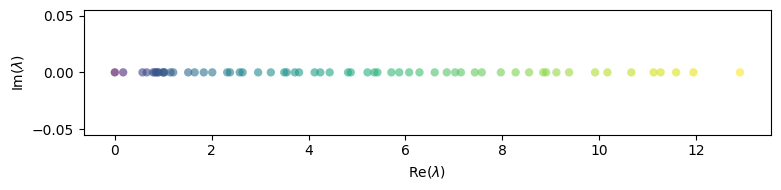

In [38]:
L = gt.laplacian(g, operator=True)
N = g.num_vertices()
#ew1 = scipy.sparse.linalg.eigs(L, k=N//2, which="LR", return_eigenvectors=False)
#ew2 = scipy.sparse.linalg.eigs(L, k=N-N//2, which="SR", return_eigenvectors=False)
#ew = np.concatenate((ew1, ew2))
ew, ev = scipy.sparse.linalg.eigsh(L, k=L.shape[0]-1, which="SA")


plt.figure(figsize=(8, 2))
plt.scatter(np.real(ew), np.imag(ew), c=np.sqrt(abs(ew)), linewidths=0, alpha=0.6)
plt.xlabel(r"$\operatorname{Re}(\lambda)$")
plt.ylabel(r"$\operatorname{Im}(\lambda)$")
plt.tight_layout()

Here we will use the information to partition our graph. We will use the second smallest eigenvector to partition our graph, this is called the feilder vector

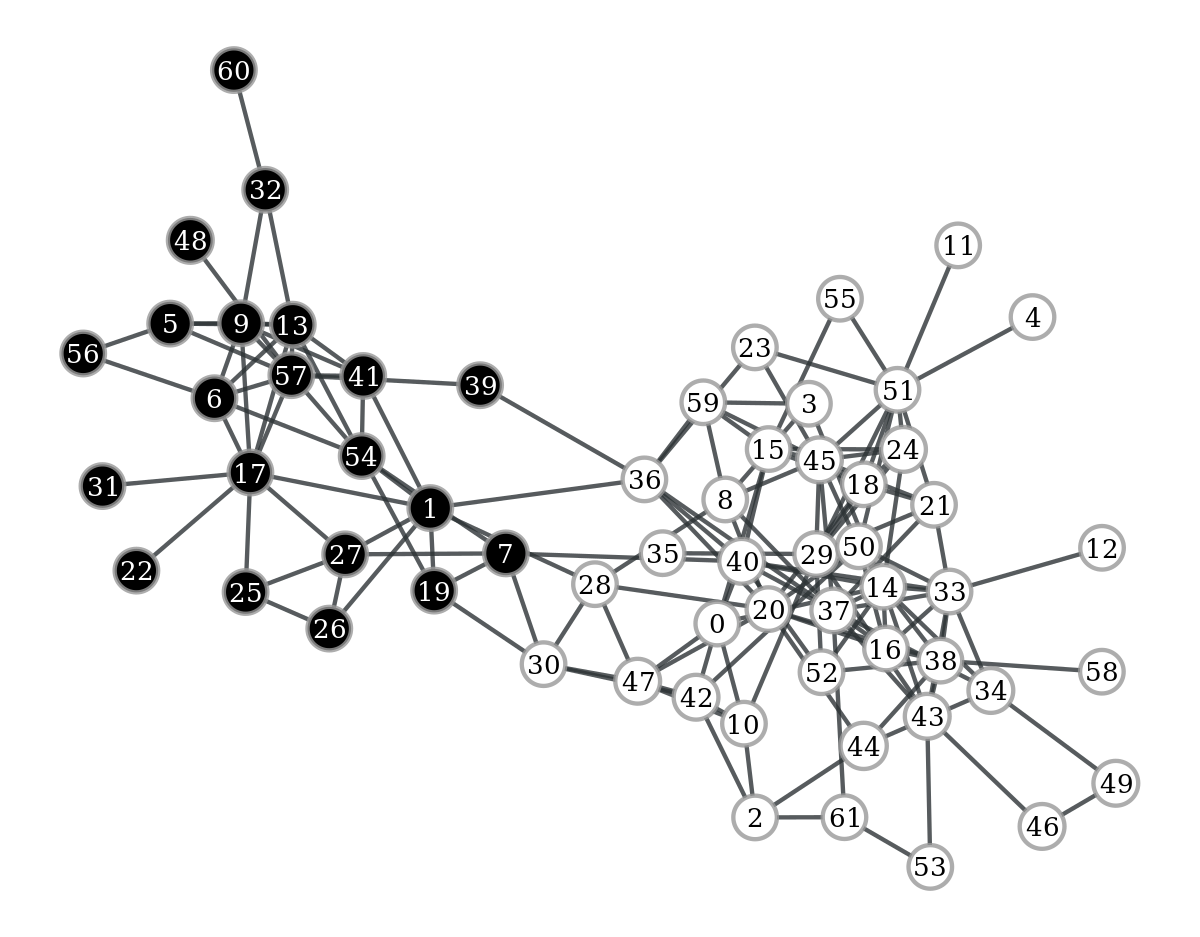

In [70]:
fiedler_vector = ev[:, 1].real
# Partition nodes based on Fiedler vector
partition = fiedler_vector > 0  # True for one cluster, False for the other

# Create a property map for visualization
community = g.new_vertex_property("int")
for v in range(N):
    community[g.vertex(v)] = int(partition[v])

# Visualize the graph with partition

graph_draw(
    g,
    pos=gt.sfdp_layout(g),
    vertex_fill_color=community,
    vertex_text=g.vertex_index,
);

We can see from the partition, two distict communities of dolphins are present.We can find more information out too. By looking at the degree of the vertices (how many connections from vertix) we can find the friendliest and loniliest dolphins!

In [80]:
degree_map = g.degree_property_map("total")

# Convert the property map to a numpy array for easy indexing
degree = np.array([degree_map[v] for v in g.vertices()])

# Lonliest node (minimum degree)
lonliest_node = np.argmin(degree)

# Friendliest node (maximum degree)
friendliest_node = np.argmax(degree)

# Print results based on degree
print(f"Lonliest dolphin (by degree): {lonliest_node}")
print(f"Friendliest dolphin (by degree): {friendliest_node}")

Lonliest dolphin (by degree): 4
Friendliest dolphin (by degree): 14
